In [10]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [11]:
# Read in processed data
df = pd.read_csv('./datasets/credit.csv')

In [12]:
# Preview data
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Have had Credit Problems,Current Credit Balance,Maximum Open Credit,Have had Bankruptcy before,Have had Tax Liens,Delinquent Time,Credit Score Range
0,0.081528,0.594985,1.0,0.004342,1.0,0.746988,0.006592,0.8,0.0,0.416667,0.011965,0.202096,0.066667,1.0,0.006940,0.000271,1.0,0.0,0.000000,"(701.2, 717.8]"
1,0.309318,0.371466,1.0,1.000000,1.0,0.939759,0.013024,0.8,0.5,0.250000,0.066998,0.167665,0.226667,1.0,0.009063,0.000487,0.0,0.0,0.666667,"(734.4, 751.0]"
2,0.467122,0.903985,1.0,0.003365,0.0,0.819277,0.004413,0.3,0.5,0.250000,0.020057,0.124251,0.106667,0.0,0.007796,0.000251,0.0,0.0,0.000000,"(717.8, 734.4]"
3,0.539748,0.312567,0.0,0.001954,1.0,0.867470,0.004957,1.0,0.0,0.250000,0.037554,0.203593,0.066667,0.0,0.006549,0.000177,0.0,0.0,0.000000,"(717.8, 734.4]"
4,0.153657,0.565583,1.0,0.002064,1.0,0.873494,0.006693,0.0,0.0,0.250000,0.024906,0.238024,0.160000,1.0,0.003716,0.000177,1.0,0.0,0.333333,"(717.8, 734.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78645,0.635777,0.429482,1.0,0.004314,1.0,0.927711,0.008776,0.7,0.0,0.250000,0.044728,0.194611,0.133333,0.0,0.012751,0.000427,0.0,0.0,1.000000,"(734.4, 751.0]"
78646,0.769598,0.558257,1.0,0.001466,1.0,0.879518,0.008688,0.6,1.0,0.250000,0.011003,0.131737,0.106667,0.0,0.002648,0.000152,0.0,0.0,0.000000,"(717.8, 734.4]"
78647,0.734902,0.423828,1.0,0.001213,1.0,0.801205,0.004149,0.4,0.0,0.250000,0.028455,0.092814,0.093333,0.0,0.002260,0.000214,0.0,0.0,0.333333,"(717.8, 734.4]"
78648,0.050081,0.972796,1.0,1.000000,1.0,0.819277,0.005411,1.0,0.0,0.250000,0.028066,0.196108,0.093333,1.0,0.005626,0.000156,0.0,0.0,0.333333,"(717.8, 734.4]"


#### Oversample imbalanced dataset for classification

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[["Credit Score Range"]] = df[["Credit Score Range"]].apply(le.fit_transform)

In [14]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
labels = df["Credit Score Range"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 58987 observation with 18 features
test data has 19663 observation with 18 features


In [16]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 21423), (1, 21423), (2, 21423), (3, 21423), (4, 21423), (5, 21423), (6, 21423), (7, 21423), (8, 21423), (9, 21423)]


### Linear Model

In [18]:

X = df.drop(columns = ['Loan ID', 'Customer ID', 'Credit Score Range', 
                       'Credit Score'])

y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
y_pred_train = LR_model.predict(X_train)
## model evaluation
print("MSE for testing set: ", mean_squared_error(y_test, y_pred), "\n")
print("MSE for training set: ", mean_squared_error(y_train, y_pred_train), "\n")
## The best R2 score is 1, it can be negative because the model is arbitrarily worse
print("R2 score for testing set: ", r2_score(y_test, y_pred), "\n")
print("R2 score for training set: ", r2_score(y_train, y_pred_train), "\n")

MSE for testing set:  0.020731413694460413 

MSE for training set:  0.020935968132080082 

R2 score for testing set:  0.2775364684968068 

R2 score for training set:  0.2721337738409869 



### Support Vector Regression

In [6]:
X = df.drop(columns = ['Loan ID', 'Customer ID', 'Credit Score', 'Credit Score Range'])
y = df['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = svm.SVR(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

print('MSE for training set: ', mean_squared_error(y_train, y_pred_train))
print('MSE for testing set: ', mean_squared_error(y_test, y_pred),'\n')

print('R2 score for training set: ', r2_score(y_train, y_pred_train))
print('R2 score for testing set: ', r2_score(y_test, y_pred))

MSE for training set:  0.02072959867346114
MSE for testing set:  0.02084024219386768 

R2 score for training set:  0.2762557478125591
R2 score for testing set:  0.2756088357369719


### Logistic Regression - Oversampled

In [7]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_resampled, y_resampled)

y_pred_train = clf.predict(X_resampled)
y_pred = clf.predict(X_test)

print('Classification report for training set:\n', classification_report(y_resampled, y_pred_train), '\n')
print('Classification report for testing set:\n', classification_report(y_test, y_pred))

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for training set:
                   precision    recall  f1-score   support

(584.834, 601.6]       0.00      0.00      0.00       180
  (601.6, 618.2]       0.00      0.00      0.00       321
  (618.2, 634.8]       0.00      0.00      0.00       495
  (634.8, 651.4]       0.00      0.00      0.00      1033
  (651.4, 668.0]       0.10      0.00      0.00      2041
  (668.0, 684.6]       0.15      0.00      0.00      3346
  (684.6, 701.2]       0.16      0.03      0.05      6156
  (701.2, 717.8]       0.26      0.05      0.09     11068
  (717.8, 734.4]       0.27      0.35      0.30     15171
  (734.4, 751.0]       0.45      0.84      0.59     18891

        accuracy                           0.38     58702
       macro avg       0.14      0.13      0.10     58702
    weighted avg       0.29      0.38      0.29     58702
 

Classification report for testing set:
                   precision    recall  f1-score   support

(584.834, 601.6]       0.00      0.00      

### Random Forest

#### Random Forest regressor

In [6]:
# plot the hyper-parameter tuning
def class_plot(grid, grid_param, title):
    scores = [x for x in grid.cv_results_['mean_test_score']]
    m_depth = grid_param['max_depth']
    n_est = grid_param['n_estimators']
    #given a new shape of max_depth array into length of n estimators array without changing the data
    scores = np.array(scores).reshape(len(m_depth), len(n_est))
    fig = plt.figure()
    ax = plt.subplot(111)
    for ind, i in enumerate(m_depth):
        plt.plot(n_est, scores[ind], '-o', label='Max depth' + str(i),)
    ax.legend(loc='lower right') #, bbox_to_anchor=(1, 0.5))
    plt.xlabel('n estimator')
    plt.ylabel('Mean score')
    plt.title(title)
    plt.show()
    


In [4]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
y = df["Credit Score"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 66648 observation with 18 features
test data has 22217 observation with 18 features


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
grid_1 = {'n_estimators': [2, 5,10,15],
          'max_depth': [30,40,45, 50]}

rf = RandomForestRegressor(random_state=1, verbose=1,n_jobs =6)
#The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
grid_rf = GridSearchCV(rf, grid_1, cv=3)
grid_rf.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    2.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Don

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    3.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    3.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    3.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Don

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_jobs=6, random_state=1,
                                             verbose=1),
             param_grid={'max_depth': [30, 40, 45, 50],
                         'n_estimators': [2, 5, 10, 15]})

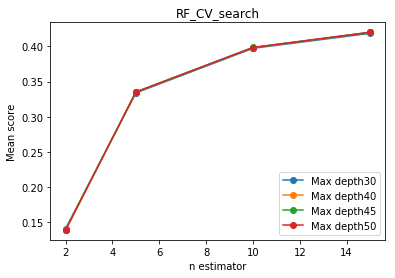

In [9]:
import matplotlib.pyplot as plt
class_plot(grid_rf, grid_1, 'RF_CV_search')

In [10]:
print (grid_rf.best_params_)
print (grid_rf.best_score_)

{'max_depth': 45, 'n_estimators': 15}
0.4200172797374851


In [11]:
# re-train the model with full training set
rf_best = grid_rf.best_estimator_
rf_best.fit(X_train, y_train)
pred_rf_test = rf_best.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    5.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished


In [12]:
rf_best.score(X_test, y_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.1s finished


0.4645312013636427

#### Random Forest Classifier(without oversample)

In [13]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
labels = df["Credit Score Range"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 66648 observation with 18 features
test data has 22217 observation with 18 features


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
classifier_RF = RandomForestClassifier()
cv_score = model_selection.cross_val_score(classifier_RF, X_train, y_train, cv=5)
print(cv_score)
print('Model accuracy of Random Forest Classfier' + ' is ' + str(cv_score.mean()))

[0.54006002 0.53225806 0.53548387 0.53980044 0.53912522]
Model accuracy of Random Forest Classfier is 0.5373455202648286


In [16]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [17]:
#find optimal hyperparameters of Random forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [48]:
print_grid_search_metrics(Grid_RF)

Best score: 0.5338793971506606
Best parameters set:
n_estimators:80


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
best_RF_model = Grid_RF.best_estimator_

In [19]:
ytrain_pred_rf = best_RF_model.predict(X_train)
ytest_pred_rf = best_RF_model.predict(X_test)

In [20]:
print(accuracy_score(y_test, ytest_pred_rf))

0.5714542917585632


In [21]:
print('Classification report for training set:\n', classification_report(y_train, ytrain_pred_rf), '\n')
print('Classification report for testing set:\n', classification_report(y_test, ytest_pred_rf), '\n')

Classification report for training set:
                   precision    recall  f1-score   support

(584.834, 601.6]       1.00      1.00      1.00       204
  (601.6, 618.2]       1.00      1.00      1.00       383
  (618.2, 634.8]       1.00      1.00      1.00       618
  (634.8, 651.4]       1.00      1.00      1.00      1201
  (651.4, 668.0]       1.00      1.00      1.00      2369
  (668.0, 684.6]       1.00      1.00      1.00      3810
  (684.6, 701.2]       1.00      1.00      1.00      7061
  (701.2, 717.8]       1.00      1.00      1.00     12415
  (717.8, 734.4]       1.00      1.00      1.00     17329
  (734.4, 751.0]       1.00      1.00      1.00     21258

        accuracy                           1.00     66648
       macro avg       1.00      1.00      1.00     66648
    weighted avg       1.00      1.00      1.00     66648
 

Classification report for testing set:
                   precision    recall  f1-score   support

(584.834, 601.6]       1.00      0.27      

In [22]:
#show feature importance
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Maximum Open Credit : 0.1062
Current Credit Balance : 0.0978
Annual Income : 0.0928
Monthly Debt : 0.0916
Current Loan Amount : 0.0907
Years of Credit History : 0.0892
Customer ID : 0.0889
Loan ID : 0.0885
Number of Open Accounts : 0.0668
Years in current job : 0.0495
Term : 0.0391
Purpose : 0.0255
Delinquent Time : 0.025
Home Ownership : 0.0194
Loan Status : 0.012
Number of Credit Problems : 0.0084
Bankruptcies : 0.006
Tax Liens : 0.0024


#### Random Forest Classifier( with oversample)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
classifier_RF = RandomForestClassifier()
cv_score = model_selection.cross_val_score(classifier_RF, X_resampled, y_resampled, cv=5)
print(cv_score)
print('Model accuracy of Random Forest Classfier' + ' is ' + str(cv_score.mean()))

[0.89775614 0.898744   0.90502399 0.92760373 0.96509549]
Model accuracy of Random Forest Classfier is 0.9188446702417913


In [31]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [32]:
#find optimal hyperparameters of Random forest through grid search
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [33]:
print_grid_search_metrics(Grid_RF)

Best score: 0.9175039984946844
Best parameters set:
n_estimators:80


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
best_RF_model = Grid_RF.best_estimator_

In [35]:
ytrain_pred_rf = best_RF_model.predict(X_resampled)
ytest_pred_rf = best_RF_model.predict(X_test)

In [41]:
print(accuracy_score(y_test, ytest_pred_rf))

0.5769455822118198


In [36]:
print('Classification report for training set:\n', classification_report(y_resampled, ytrain_pred_rf), '\n')
print('Classification report for testing set:\n', classification_report(y_test, ytest_pred_rf), '\n')

Classification report for training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21258
           1       1.00      1.00      1.00     21258
           2       1.00      1.00      1.00     21258
           3       1.00      1.00      1.00     21258
           4       1.00      1.00      1.00     21258
           5       1.00      1.00      1.00     21258
           6       1.00      1.00      1.00     21258
           7       1.00      1.00      1.00     21258
           8       1.00      1.00      1.00     21258
           9       1.00      1.00      1.00     21258

    accuracy                           1.00    212580
   macro avg       1.00      1.00      1.00    212580
weighted avg       1.00      1.00      1.00    212580
 

Classification report for testing set:
               precision    recall  f1-score   support

           0       0.86      0.30      0.44        64
           1       0.87      0.38      0.53      

In [37]:
#show feature importance
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Maximum Open Credit : 0.0959
Current Credit Balance : 0.0928
Monthly Debt : 0.0927
Annual Income : 0.0927
Customer ID : 0.0912
Loan ID : 0.0902
Years of Credit History : 0.0895
Current Loan Amount : 0.0884
Number of Open Accounts : 0.0715
Years in current job : 0.0486
Term : 0.0367
Delinquent Time : 0.0285
Purpose : 0.0281
Home Ownership : 0.0208
Loan Status : 0.0114
Number of Credit Problems : 0.0101
Bankruptcies : 0.0081
Tax Liens : 0.0027
